In [8]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.text_cell_render.rendered_html{font-size:13pt;}
div.text_cell_render ul li{font-size:13pt; line-height:30px;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:20pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:13pt;padding:5px;}
table.dataframe{font-size:13px;}
</style>
"""))

In [13]:
import pandas as pd
import numpy as np
import sys # 최대 정수
from tensorflow.keras import utils # utils.to_categorical() : 분류분석시 y데이터 원핫인코딩
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# 로지스틱 회귀분석(이진분류)
## 1. 데이터 셋 생성 & 전처리

In [14]:
# 1. csv파일을 데이터프레임을 읽어오기(결측치처리, 균형확인 용이) 기본encoding=utf-8
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.head()
# 0. 임신횟수
# 1. 2시간내 포도당 농도
# 2. 혈압
# 3. 피부접힘 두께
# 4. 인슐린수치
# 5. BMI체질량지수
# 6. 가족력
# 7. 나이

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.shape

(768, 9)

In [16]:
df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.isna().sum() # 열별 결측치 갯수

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [18]:
# 타겟변수의 균형
df[8].value_counts()/len(df)

0    0.651042
1    0.348958
Name: 8, dtype: float64

In [19]:
df.values
df.to_numpy()

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [20]:
# 2. csv파일을 numpy 배열로 읽어오기 : np.loadtxt() #이 있는 행은 제외하고 읽어오기
        #기본 encoding=cp949
dataset = np.loadtxt('data/pima-indians-diabetes.csv',delimiter=',', encoding='utf-8')
dataset.shape

(768, 9)

In [21]:
# 데이터 분할 : 학습데이터셋(모델학습용) + 시험데이터셋(모델평가용)
X_train= dataset[:620, :-1]
y_train= dataset[:620, -1]

X_test= dataset[620:, :-1]
y_test= dataset[620:, -1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((620, 8), (620,), (148, 8), (148,))

## 2. 모델구성

In [43]:
model= Sequential()
# model.add (Dense(units=32, input_dim=8 # input_shape(8,)
#            activation='relu'))

model.add(Input(shape=(8,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='elu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                288       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [44]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. 학습

In [45]:
%%time
hist= model.fit(X_train, y_train, #훈련데이터셋(학습데이터셋)
                epochs=200,
                batch_size=310,
#                validation_data=(X_test, y_test), 검증 데이터 
                validation_split=0.1, # 검증데이터 비율 (훈련데이터에서 10%를 검증용 데이터로)
                verbose=0)

CPU times: total: 6.36 s
Wall time: 5.39 s


In [27]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 5. 모델 평가하기
- 학습과정 시각화하여 살펴보기
- 평가
- 교차표(혼동매트릭스, 성능평가지표) 그리기

In [29]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

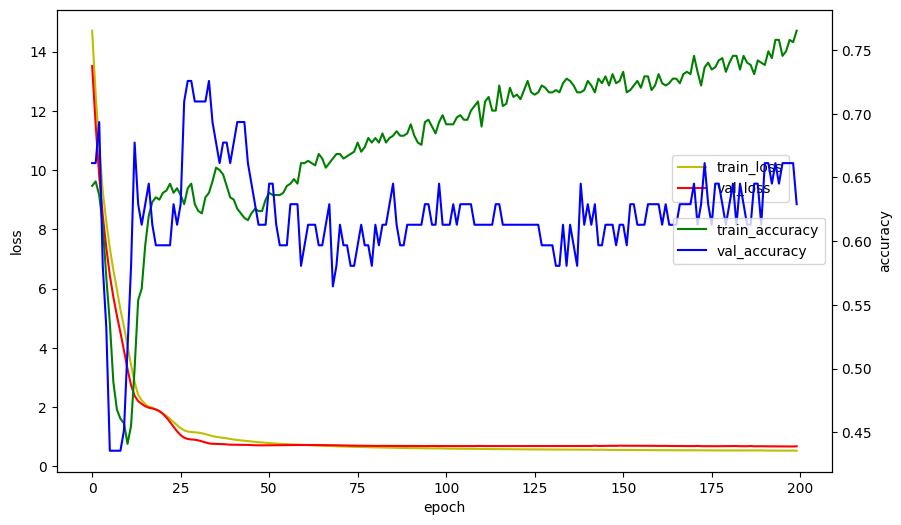

In [46]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'],'y',label='train_loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val_loss')
acc_ax= loss_ax.twinx() #
acc_ax.plot(hist.history['accuracy'],'g',label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.953,0.7))
acc_ax.legend(loc='center right')
plt.show()

In [47]:
# 모델 평가 사용하면 안됨
model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.7274


[0.5405502319335938, 0.727419376373291]

In [49]:
score= model.evaluate(X_test,y_test)
print("loss: {}, 정확도:{:.2f}%".format(score[0], score[1]*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.6622
loss: 0.6331360936164856, 정확도:66.22%


In [53]:
# 교차표(혼동 매트릭스, 성능 평가지표) 그리기: 테스트 셋의 실제값과 예측값
y_hat= (model.predict(X_test) >= 0.5).astype(int)
y_test.shape, y_hat.shape #실제값(1차원), 예측값 (2차원)

5/5 [==============================] - 0s 999us/step


(148,)

In [57]:
TN= 0; FP=0; FN=0; TP=0;
for y, h in zip(y_test, y_hat.reshape(-1)):
#     print(y, h)
    if y==0 and h==0:
        TN += 1 # TN갯수 하나 증가
    elif y== 0 and h==1:
        FP += 1
    elif y==1 and h==0:
        FN += 1
    else:
        TP += 1
print(TN, FP)
print(FN, TP)

81 15
35 17


In [62]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
ctab.index.name= '실제값'
ctab.columns.name = '예측값'
ctab

pd.crosstab(y_test, y_hat.reshape(-1), rownames=['실제값'], colnames=['예측값']) # 결과가 되는 데이터 프레임

예측값,0,1
실제값,,
0.0,81,15
1.0,35,17


In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat) # y_hat.reshape(-1) 둘다 가능
# 결과가 numpy배열인 혼동행렬

array([[81, 15],
       [35, 17]], dtype=int64)

## 6. 모델 사용 (예측, 로드)

In [65]:
X_test[0]

array([  2.   , 112.   ,  86.   ,  42.   , 160.   ,  38.4  ,   0.246,
        28.   ])

In [66]:
(model.predict([[2, 112, 86, 42, 160, 38.4, 0.246, 28]])>0.5).astype(int)

1/1 [==============================] - 0s 27ms/step


array([[0]])

In [67]:
(model.predict([[2, 112, 86, 42, 160, 38.4, 0.246, 28],[2, 112, 86, 42, 160, 38.4, 0.246, 28]],)>0.5).astype(int)

1/1 [==============================] - 0s 26ms/step


array([[0],
       [0]])

In [69]:
from tensorflow.keras.models import save_model, load_model
model.save('model/06binary.h5')
save_model(model, 'model/06binary.h5')

In [70]:
model2= load_model('model/06binary.h5')

In [71]:
(model2.predict([[2, 112, 86, 42, 160, 38.4, 0.246, 28]])>0.5).astype(int)

1/1 [==============================] - 0s 56ms/step


array([[0]])

# 분류분석
- 1. 데이터 생성 및 전처리: 훈련 셋600 , 검증 셋100, 테스트 셋 68으로 분리, 타겟변수의 원핫인코딩
- 2. 모델생성 ( input 8, output2): 출력층의 활성화함수:'softmax'
- 3. 모델학습과정 loss='categorical_crossentropy' ,etrics=['accuracy']
- 4. 모델 학습 validation_data = [X_val, Y_val]
- 5. 모델 학습 평가
- 6. 모델 사용 -예측
             0    1
             0.99 0.01
## 1. 데이터 셋 생성 및 전처리

In [107]:
# 훈련셋 600, 검증셋 100, 테스트 셋 68
X_train = dataset[:600, :-1]
y_train= dataset[:600, -1]
X_val= dataset[600:700, :-1]
y_val= dataset[600:700, -1]
X_test= dataset[700:, :-1]
y_test= dataset[700:, -1]
X_train.shape , y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [108]:
# 분류분석을 위한 타겟(종속)변수의 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val, 2)
Y_test  = utils.to_categorical(y_test)
Y_train.shape, Y_val.shape, Y_test.shape

((600, 2), (100, 2), (68, 2))

In [109]:
print('원 데이터: ', y_train[0:3])
print('원 핫인코딩 데이터: \n', Y_train[:3])

원 데이터:  [1. 0. 1.]
원 핫인코딩 데이터: 
 [[0. 1.]
 [1. 0.]
 [0. 1.]]


## 모델생성(input8, target2)

In [112]:
model= Sequential()
# model.add (Dense(units=32, input_dim=8 # input_shape(8,)
#            activation='relu'))

model.add(Dense(units=32, input_shape=(8,) , activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                288       
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 2)                 34        
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정설정

In [115]:
model.compile(loss='categorical_crossentropy', 
              optimizer='nadam', 
              metrics=['accuracy'])

## 4. 모델학습

In [116]:
hist = model.fit(X_train, Y_train,
                epochs=200,
                validation_data=(X_val, Y_val),
                verbose=1)

Epoch 1/200
19/19 [==============================] - 1s 8ms/step - loss: 8.0825 - accuracy: 0.6533 - val_loss: 2.7795 - val_accuracy: 0.6400
Epoch 2/200
19/19 [==============================] - 0s 2ms/step - loss: 1.2839 - accuracy: 0.6000 - val_loss: 0.8723 - val_accuracy: 0.6000
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 0.8467 - accuracy: 0.6350 - val_loss: 0.7803 - val_accuracy: 0.6300
Epoch 4/200
19/19 [==============================] - 0s 2ms/step - loss: 0.7635 - accuracy: 0.6467 - val_loss: 0.7337 - val_accuracy: 0.5800
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 0.7140 - accuracy: 0.6567 - val_loss: 0.6953 - val_accuracy: 0.5800
Epoch 6/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.6533 - val_loss: 0.6778 - val_accuracy: 0.6200
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.6700 - val_loss: 0.6722 - val_accuracy: 0.6800
Epoch 8/200
1

Epoch 59/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.7467 - val_loss: 0.5696 - val_accuracy: 0.7500
Epoch 60/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.7567 - val_loss: 0.5538 - val_accuracy: 0.6900
Epoch 61/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7450 - val_loss: 0.6209 - val_accuracy: 0.6800
Epoch 62/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7483 - val_loss: 0.5546 - val_accuracy: 0.6900
Epoch 63/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7583 - val_loss: 0.5741 - val_accuracy: 0.7100
Epoch 64/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.7400 - val_loss: 0.5521 - val_accuracy: 0.7600
Epoch 65/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4984 - accuracy: 0.7483 - val_loss: 0.5773 - val_accuracy: 0.6600
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.7800 - val_loss: 0.5409 - val_accuracy: 0.7400
Epoch 117/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.7700 - val_loss: 0.5708 - val_accuracy: 0.7100
Epoch 118/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.7883 - val_loss: 0.5481 - val_accuracy: 0.7400
Epoch 119/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.7683 - val_loss: 0.5491 - val_accuracy: 0.7200
Epoch 120/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4489 - accuracy: 0.7700 - val_loss: 0.5526 - val_accuracy: 0.7300
Epoch 121/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7783 - val_loss: 0.5423 - val_accuracy: 0.7500
Epoch 122/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7717 - val_loss: 0.5735 - val_accuracy: 0.6800
Epoch 123/200

19/19 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.7800 - val_loss: 0.5430 - val_accuracy: 0.7700
Epoch 174/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.7817 - val_loss: 0.5616 - val_accuracy: 0.7000
Epoch 175/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.7983 - val_loss: 0.5401 - val_accuracy: 0.7500
Epoch 176/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7733 - val_loss: 0.5374 - val_accuracy: 0.7800
Epoch 177/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8083 - val_loss: 0.5404 - val_accuracy: 0.7200
Epoch 178/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7900 - val_loss: 0.5487 - val_accuracy: 0.7500
Epoch 179/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.7917 - val_loss: 0.5561 - val_accuracy: 0.7600
Epoch 180/200

## 5. 모델평가

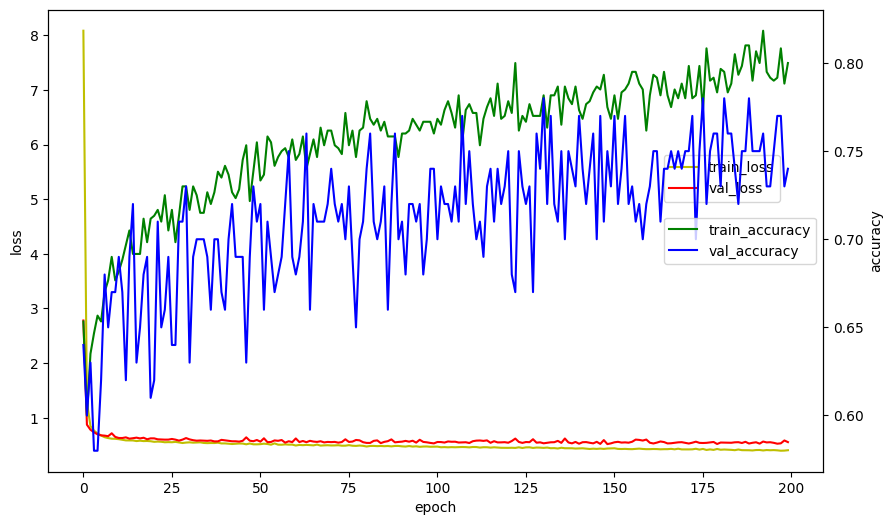

In [117]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'],'y',label='train_loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val_loss')
acc_ax= loss_ax.twinx() #
acc_ax.plot(hist.history['accuracy'],'g',label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.953,0.7))
acc_ax.legend(loc='center right')
plt.show()

In [118]:
# 모델 평가
model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.7059


[0.6518247127532959, 0.7058823704719543]

In [133]:
# 혼동행렬, 교차표 (원핫인코딩을 다시 복구)
# y_test 실제값
y_hat = model.predict(X_test).argmax(axis=1)

3/3 [==============================] - 0s 2ms/step


In [134]:

pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1
실제값,,
0.0,31,10
1.0,10,17


## 6. 모델 사용하기

In [125]:
X_test[0]

array([  2.   , 122.   ,  76.   ,  27.   , 200.   ,  35.9  ,   0.483,
        26.   ])

In [129]:
pred= model.predict(X_test[0].reshape(-1,8))

1/1 [==============================] - 0s 19ms/step


array([[0.76593363, 0.23406632]], dtype=float32)